In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# VERİ ÇERÇEVESİNİ TANIMAK

In [2]:
file_path="../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Buraya kadar en çok dikkatimizi çeken şey, TotalCharges kolonunun df.head() içerisinde nümerik değer aldığını görmemize rağmen
veri tipinin object olarak görülmesi. Bununla ileride, Keşifsel Veri Analizi kısmında ilgileneceğiz. Bunun dışında eksik değerlerimizin 
olmadığı, genelde object değerlerden oluşan bir veri seti üzerinde çalışıyoruz.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Burada da gözüktüğü üzere TotalCharges sütunu alınmamış.

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Burada object türlü verilerin birkaçının dağılımın yüzdesine bakalım:

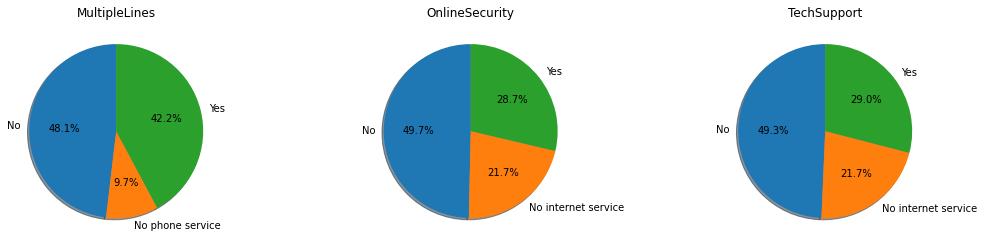

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.pie(df.groupby("MultipleLines")["MultipleLines"].count(), labels=df.groupby("MultipleLines")["MultipleLines"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('MultipleLines')
plt.subplot(1,3,2)
plt.pie(df.groupby("OnlineSecurity")["OnlineSecurity"].count(), labels=df.groupby("OnlineSecurity")["OnlineSecurity"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('OnlineSecurity')
plt.subplot(1,3,3)
plt.pie(df.groupby("TechSupport")["TechSupport"].count(), labels=df.groupby("TechSupport")["TechSupport"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('TechSupport')
plt.show()

# İstatistiğe Giriş

Bazı temel istatistik kavramları ile veri setimizdeki float türündeki değerleri inceleyelim.

***Ortalama***

In [9]:
print(np.mean(df['tenure']))
print(np.mean(df['MonthlyCharges']))

32.37114865824223
64.76169246059922


***Medyan***

In [10]:
print(np.median(df['tenure']))
print(np.median(df['MonthlyCharges']))

29.0
70.35


***Mod***

In [11]:
statistics.mode(df['tenure'])
statistics.mode(df['MonthlyCharges'])

20.05

***Varyans***

In [12]:
print(df['tenure'].var())
print(df['MonthlyCharges'].var())

603.1681081237256
905.4109343405128


***Standart Hata***

In [13]:
print(stats.sem(df['tenure']))
print(stats.sem(df['MonthlyCharges']))

0.29264448299851326
0.3585452912470189


**Dağılımlar**

***Normal Dağılım***

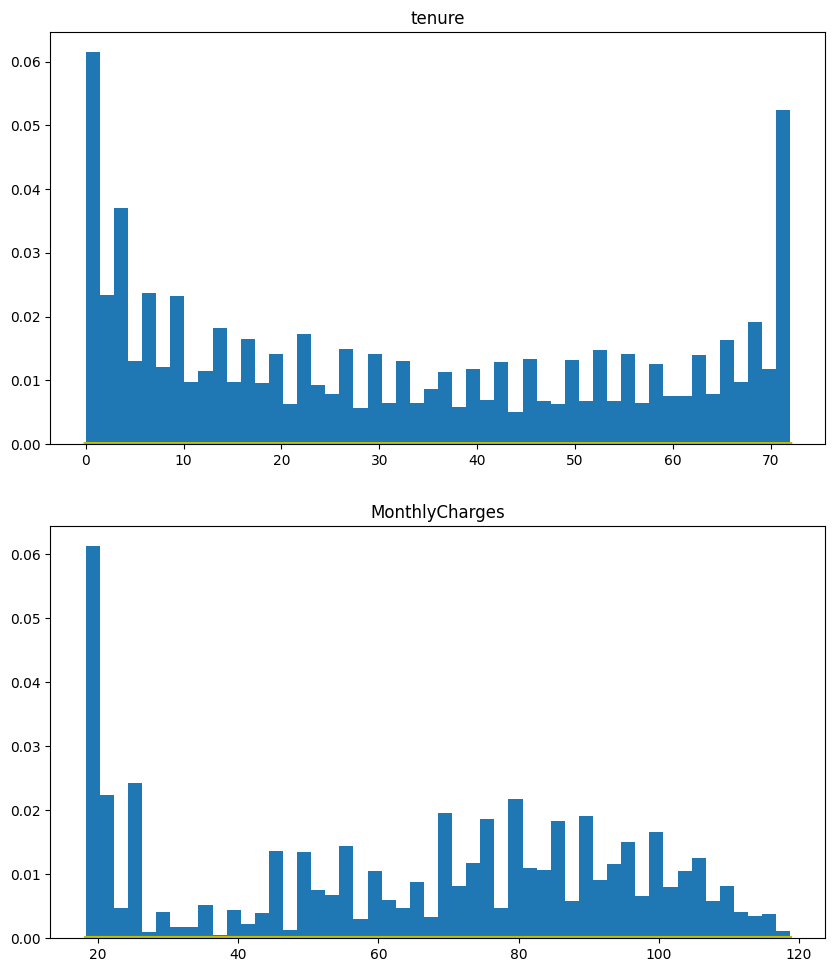

In [14]:
mu, sigma, n = 0.5, 0.1, 10000
plt.figure(figsize=(10,12), dpi = 100)
plt.subplot(2,1,1)
count, bins, ignore = plt.hist(df["tenure"], 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=3, color='y')
plt.title("tenure")
plt.subplot(2,1,2)
count, bins, ignore = plt.hist(df["MonthlyCharges"], 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=3, color='y')
plt.title("MonthlyCharges")
plt.show()

İki değişkenimiz de normal dağılım olmaktan çok uzak.

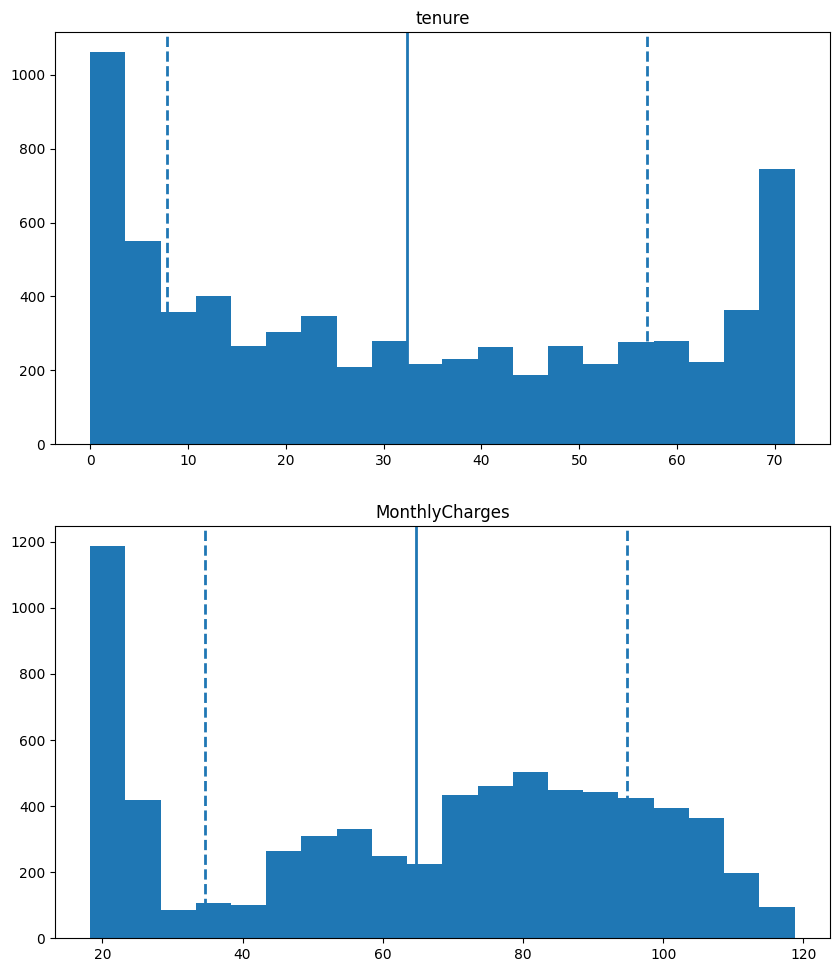

In [15]:
mu, sigma, n = 0.5, 0.1, 10000
plt.figure(figsize=(10,12), dpi = 100)
plt.subplot(2,1,1)
plt.hist(df["tenure"], bins=20)
plt.axvline(np.mean(df["tenure"]), linestyle='solid', linewidth=2)
plt.axvline(np.mean(df["tenure"]) + np.std(df["tenure"]), 
            linestyle='dashed', linewidth=2)
plt.axvline(np.mean(df["tenure"]) - np.std(df["tenure"]), 
            linestyle='dashed', linewidth=2)
plt.title("tenure")
plt.subplot(2,1,2)
plt.hist(df["MonthlyCharges"], bins=20)
plt.axvline(np.mean(df["MonthlyCharges"]), linestyle='solid', linewidth=2)
plt.axvline(np.mean(df["MonthlyCharges"]) + np.std(df["MonthlyCharges"]), 
            linestyle='dashed', linewidth=2)
plt.axvline(np.mean(df["MonthlyCharges"]) - np.std(df["MonthlyCharges"]), 
            linestyle='dashed', linewidth=2)
plt.title("MonthlyCharges")
plt.show()

***Popülasyon***

In [16]:
print('Tenure oranı: ', len(df[df["tenure"] > 30])/len(df["tenure"])*100) #Tenure 'ın 30'dan büyük olma oranı
print('MonthlyCharges oranı: ', len(df[df["MonthlyCharges"] > 75])/len(df["MonthlyCharges"])*100) #MonthlyCharges'ın 75'ten büyük olma oranı

Tenure oranı:  48.30327985233565
MonthlyCharges oranı:  44.29930427374698


# Keşifsel Veri Analizi

***Veri Temizleme ve Eksik Veriler***

TotalCharges sütununun float değer göstermesine rağmen veri tipinin object olduğunu görmüştük.
 Şimdi gerçek tipine çevirebiliriz.

In [17]:
for sutun_adi in ["TotalCharges"]:
    print("{} sütunu için problemli değerler : ".format(sutun_adi))
    hatali_degerler = []
    for deger in df[sutun_adi]:
        try:
            float(deger)
        except:
            hatali_degerler.append(deger)
    print(set(hatali_degerler))

TotalCharges sütunu için problemli değerler : 
{' '}


In [18]:
df["TotalCharges"]=df["TotalCharges"].apply(str.strip).replace(" ", np.nan)
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], downcast="float")

(" ") şeklindeki problemli değerleri tespit ettik.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Ancak onları çıkarınca sütunda 11 eksik değer verdi.

In [20]:
df.isnull().head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
df["TotalCharges"].mean()

2283.29833984375

In [23]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [24]:
df.isnull().sum()*100/df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

TotalCharges sütunundaki eksik değerleri tespit edip sütunun ortalaması ile doldurduk. Böylece eksik değer kalmadı.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Aykırı Değerler***

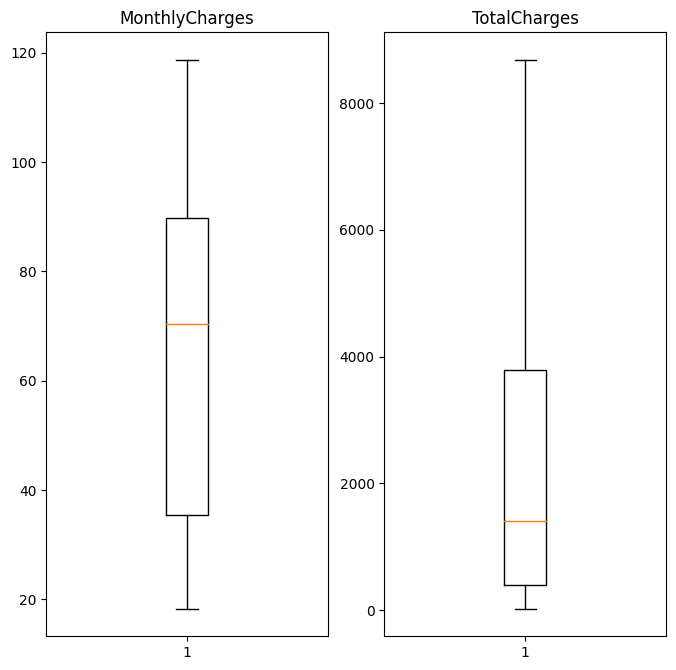

In [26]:
plt.rcParams["figure.dpi"]= 100
plt.rcParams["figure.figsize"] = (8,8)
plt.subplot(1,2,1)
plt.boxplot(df["MonthlyCharges"])
plt.title("MonthlyCharges")

plt.subplot(1,2,2)
plt.boxplot(df["TotalCharges"])
plt.title("TotalCharges")
plt.show()

In [27]:
df.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2322-VCZHZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Box plot üzerinde hemen göremediğimiz aykırı değerler için bir de istatistiksel yöntemler uyguluyoruz.

***Z-score***

In [28]:

from scipy.stats import zscore

z_scores = zscore(df["TotalCharges"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 1362
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 394
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 0
------


In [29]:
z_scores = zscore(df["MonthlyCharges"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 1324
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 0
------


***Tukey Metodu***

In [30]:
q75, q25 = np.percentile(df["TotalCharges"], [75 ,25])
caa = q75 - q25

esik_degerleri = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((df["TotalCharges"] > maks_deger)| 
                                       (df["TotalCharges"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,aykiri_deger_sayısı,esik_degeri
0,277.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


Çözüm olarak da önce winsorize yöntemini deniyoruz.

In [31]:
from scipy.stats.mstats import winsorize

winsorize_tcharges = winsorize(df["TotalCharges"], (0, 0.10))

winsorize_tcharges

masked_array(data=[  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 ,
                   5974.3 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

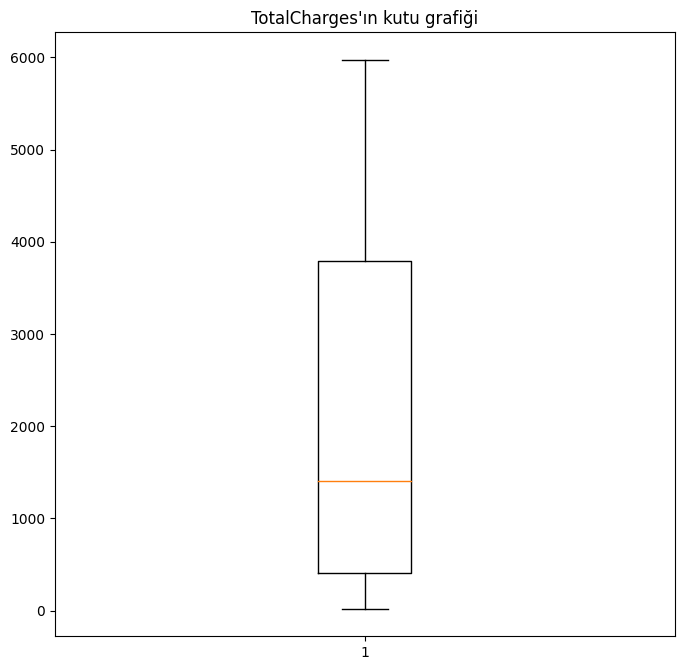

In [32]:
plt.boxplot(winsorize_tcharges)
plt.title("TotalCharges'ın kutu grafiği")
plt.show()

Önceki grafikte 8000+ olan üst sınır winsorize işlemi sonunda 6000+ üst sınırına düşmüş.

***Log Dönüşümü***

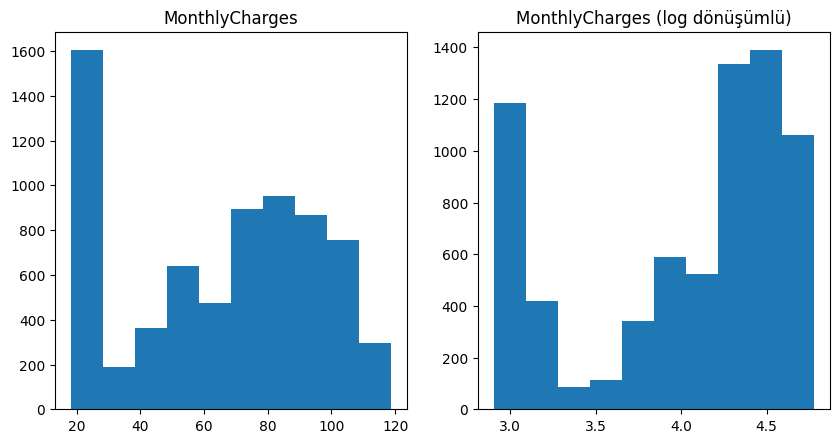

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.hist(df["MonthlyCharges"])
plt.title("MonthlyCharges")

plt.subplot(1,2,2)
plt.hist(np.log(df["MonthlyCharges"]))
plt.title("MonthlyCharges (log dönüşümlü)")
plt.show()

In [34]:
q75_log, q25_log = np.percentile(np.log(df["TotalCharges"]), [75 ,25])
caa_log = q75_log - q25_log

log_esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi', 'aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log = q25_log - (caa_log*esik_degeri) 
    maks_deger_log = q75_log + (caa_log*esik_degeri)
    min_deger = q25 - (caa*esik_degeri) #log dönüşümü olmadan
    maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
    
    aykiri_deger_sayisi_log = len((np.where((np.log(df["TotalCharges"]) > maks_deger_log)| 
                                       (np.log(df["TotalCharges"]) < min_deger_log))[0]))
    aykiri_deger_sayisi = len((np.where((df["TotalCharges"] > maks_deger)| 
                                       (df["TotalCharges"] < min_deger))[0]))
    log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                    'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                    'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                    }, ignore_index=True)
log_esik_degerleri

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.0,277.0,255.0
1,1.5,0.0,0.0
2,2.0,0.0,0.0
3,2.5,0.0,0.0
4,3.0,0.0,0.0
5,3.5,0.0,0.0
6,4.0,0.0,0.0
7,4.5,0.0,0.0


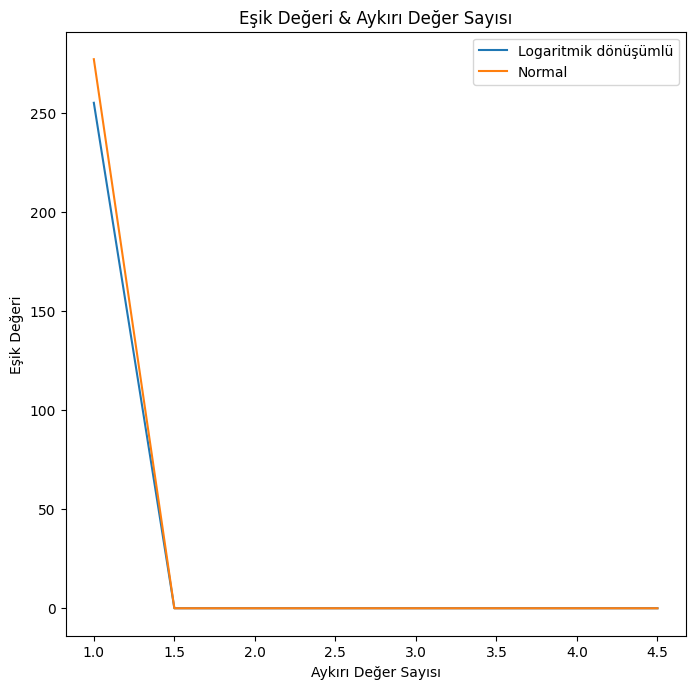

In [35]:
log_esik_degerleri.plot(x = 'esik_degeri', y=['aykiri_deger_sayisi_log', 'aykiri_deger_sayisi'])
plt.title('Eşik Değeri & Aykırı Değer Sayısı' )
plt.ylabel('Eşik Değeri')
plt.xlabel('Aykırı Değer Sayısı')
plt.legend(('Logaritmik dönüşümlü', 'Normal'))
plt.show()

**Veri Keşfi**

***Tek Değişkenli Analiz***

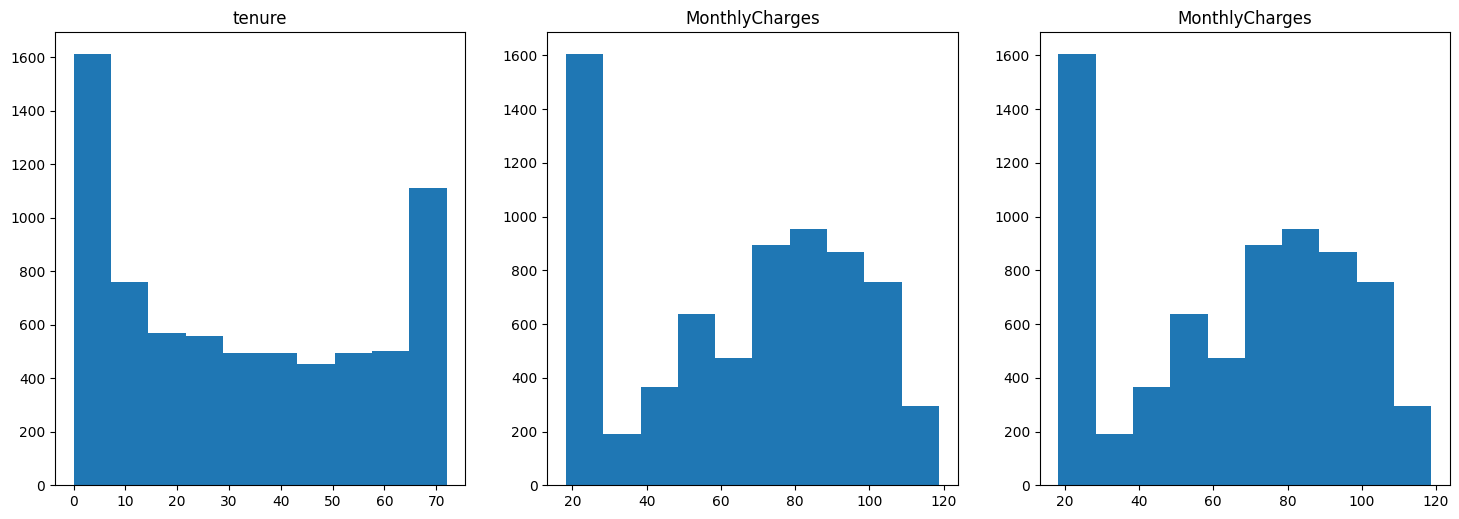

In [36]:
df["winsorize_tenure"] = winsorize(df["tenure"], (0, 0.10))
df["winsorize_MonthlyCharges"] = winsorize(df["MonthlyCharges"], (0, 0.10))
df["winsorize_TotalCharges"] = winsorize(df["TotalCharges"], (0, 0.10))

plt.figure(figsize=(18,6))
degiskenler = ['tenure', 'MonthlyCharges' , 'MonthlyCharges']
winsorize_degiskenler = ['winsorize_tenure', 'winsorize_MonthlyCharges', 'winsorize_TotalCharges']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(df[degiskenler[i]])
    plt.title(degiskenler[i])
  

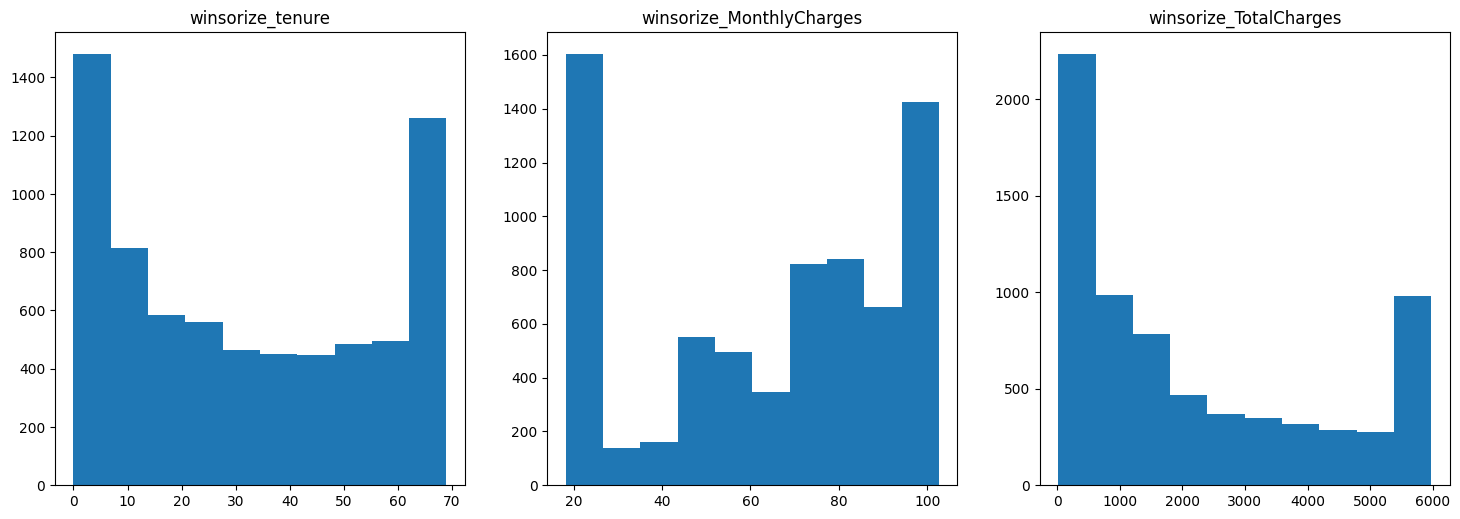

In [37]:
plt.figure(figsize=(18,6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(df[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i])
    

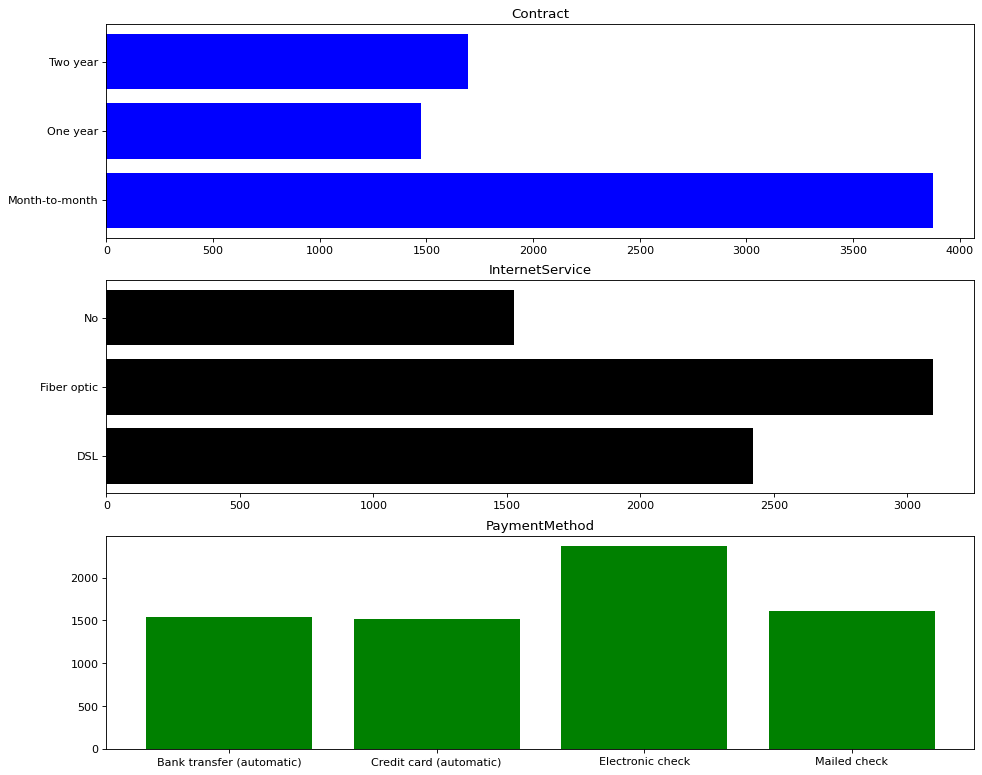

In [38]:
#Kategorik değişkenler

plt.figure(figsize=(14,12), dpi=80)

plt.subplot(3,1,1)
plt.barh(df.groupby("Contract")["Contract"].count().index, 
        df.groupby("Contract")["Contract"].count(),
        color=["blue"])
plt.title("Contract")
plt.subplot(3,1,2)
plt.barh(df.groupby("InternetService")["InternetService"].count().index, 
        df.groupby("InternetService")["InternetService"].count(),
        color=["black"])
plt.title("InternetService")
plt.subplot(3,1,3)
plt.bar(df.groupby("PaymentMethod")["PaymentMethod"].count().index, 
        df.groupby("PaymentMethod")["PaymentMethod"].count(),
       color=["green"])
plt.title("PaymentMethod")
plt.show()

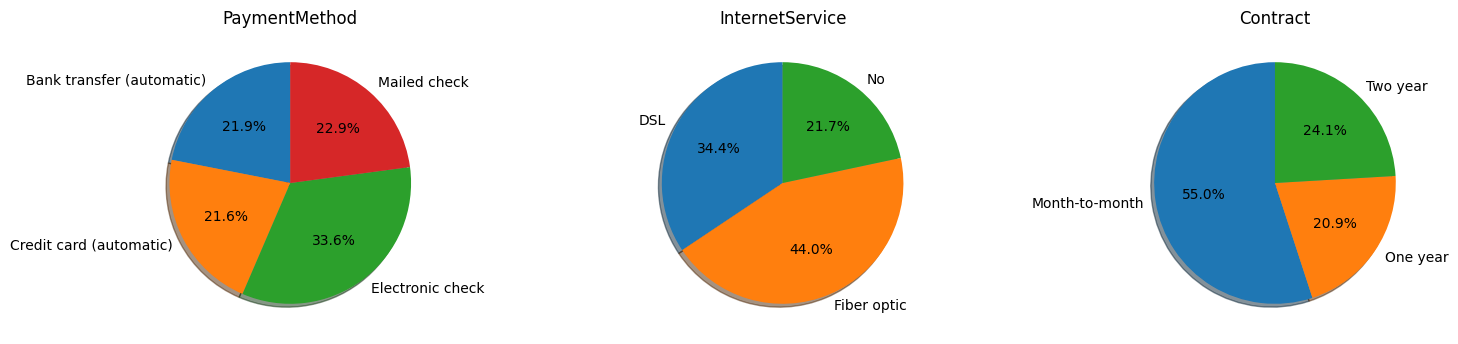

In [39]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.pie(df.groupby("PaymentMethod")["PaymentMethod"].count(), labels=df.groupby("PaymentMethod")["PaymentMethod"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('PaymentMethod')
plt.subplot(1,3,2)
plt.pie(df.groupby("InternetService")["InternetService"].count(), labels=df.groupby("InternetService")["InternetService"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('InternetService')
plt.subplot(1,3,3)
plt.pie(df.groupby("Contract")["Contract"].count(), labels=df.groupby("Contract")["Contract"].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Contract')
plt.show()

***Çok Değişkenli Analiz***

In [40]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,winsorize_tenure,winsorize_MonthlyCharges,winsorize_TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,0.016857,0.222690,0.104883
tenure,0.016567,1.000000,0.247900,0.824757,0.999655,0.233088,0.835831
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,0.247168,0.997829,0.646877
TotalCharges,0.102395,0.824757,0.650468,1.000000,0.822947,0.630927,0.989207
winsorize_tenure,0.016857,0.999655,0.247168,0.822947,1.000000,0.232639,0.835673
winsorize_MonthlyCharges,0.222690,0.233088,0.997829,0.630927,0.232639,1.000000,0.633391
winsorize_TotalCharges,0.104883,0.835831,0.646877,0.989207,0.835673,0.633391,1.000000


<AxesSubplot:>

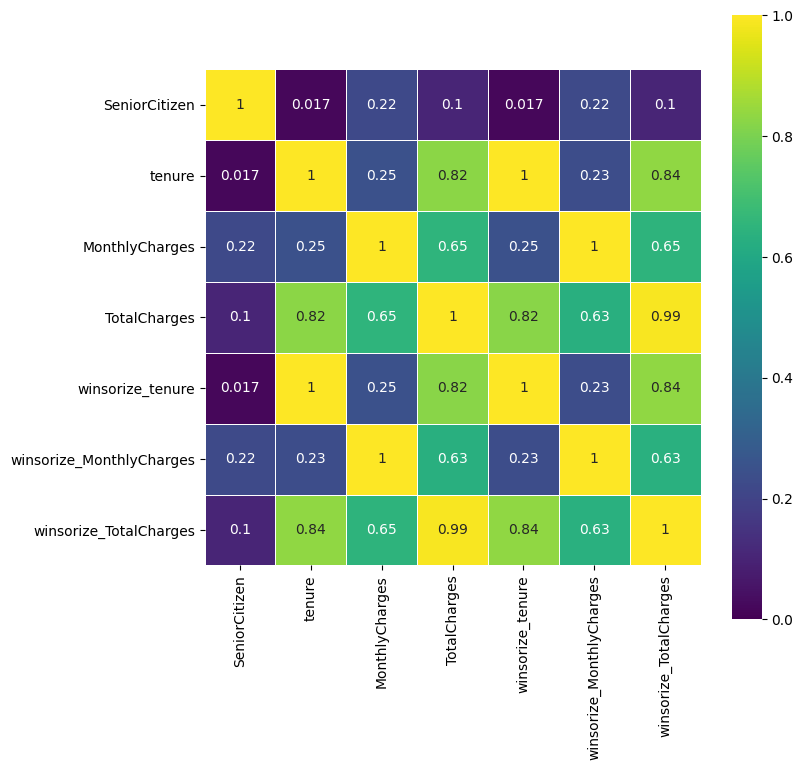

In [41]:
sns.heatmap(df.corr(),  square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

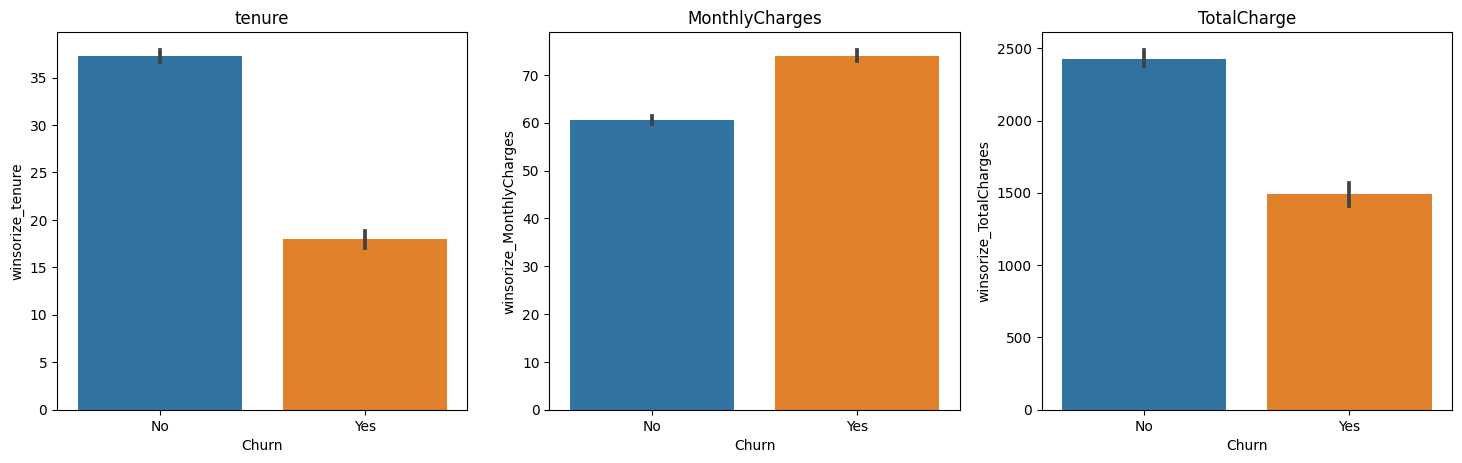

In [42]:
#Sürekli ve kategorik bir çiftin iki değişkenli analizi
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["Churn"], df["winsorize_tenure"])
plt.title("tenure")

plt.subplot(1,3,2)
sns.barplot(df["Churn"], df["winsorize_MonthlyCharges"])
plt.title("MonthlyCharges")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(df["Churn"], df["winsorize_TotalCharges"])
plt.title("TotalCharge")

plt.show()

Oran olarak baktığımızda Churn sütununa etki bakımından önce tenure, sonra TotalCharges, sonra da MonthlyCharges gelmekte.

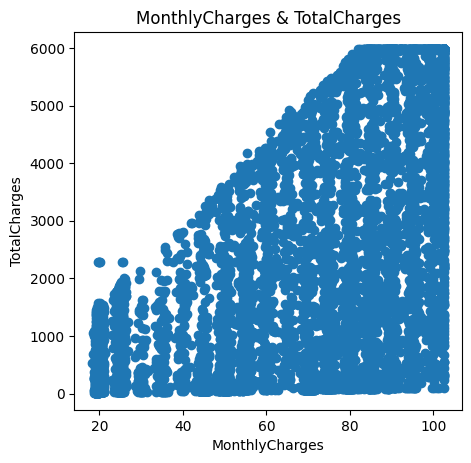

In [43]:
#İki sürekli değişkenin iki değişkenli analizi

plt.figure(figsize=(5,5))
plt.scatter(df["winsorize_MonthlyCharges"], df["winsorize_TotalCharges"])
plt.title("MonthlyCharges & TotalCharges")
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

In [44]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

churn_status = df["Churn"].unique()
grup_df = df.groupby("Churn")

pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_MonthlyCharges", "winsorize_TotalCharges", "winsorize_tenure"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(churn_status)):
        for j in range(i+1, len(churn_status)):
            ttest = stats.ttest_ind(df[df["Churn"]==churn_status[i]][var], 
                                df[df["Churn"]==churn_status[j]][var])
            grup_1 = churn_status[i]
            grup_2 = churn_status[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_MonthlyCharges için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,No,Yes,-17.329945823015073,0.000000000000000


winsorize_TotalCharges için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,No,Yes,17.351574026067681,0.000000000000000


winsorize_tenure için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,No,Yes,31.587596793581589,0.000000000000000


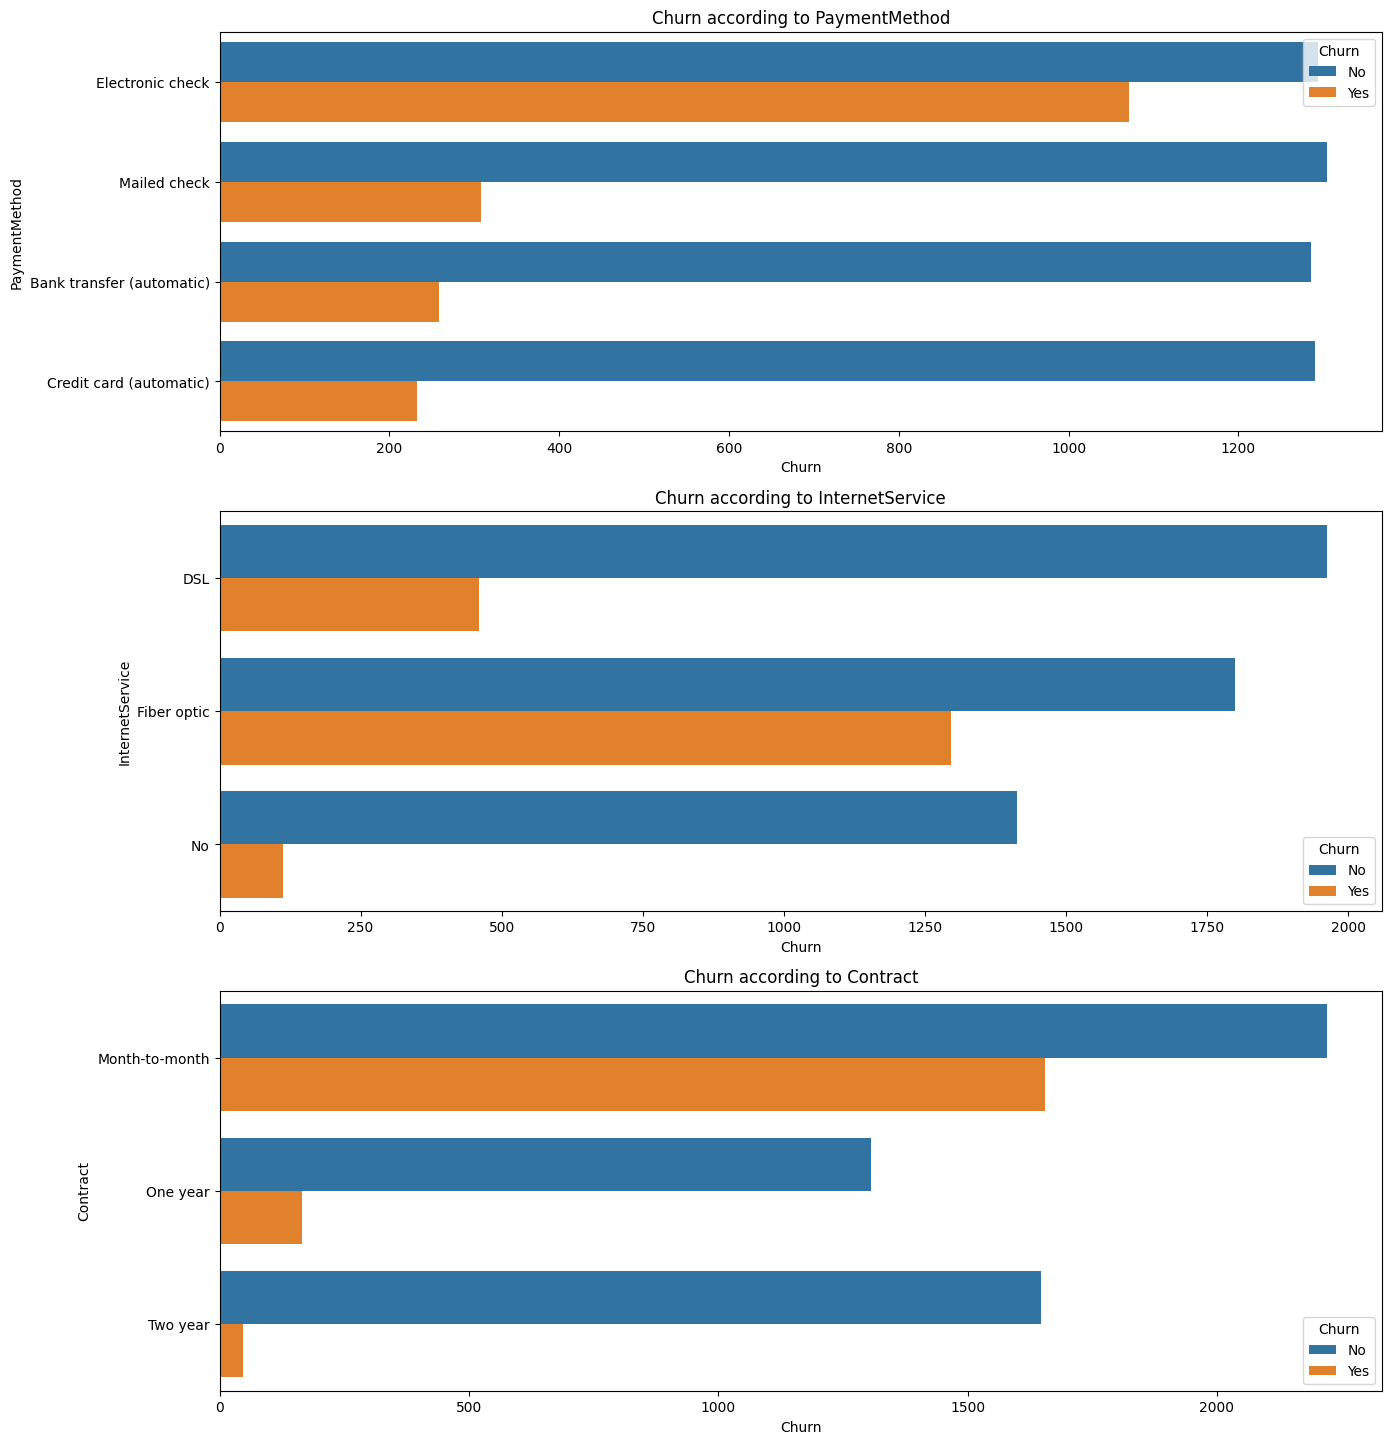

In [45]:
#kategorik değişkenler için
plt.figure(figsize=(15,18))
plt.subplot(3,1,1)
sns.countplot(y="PaymentMethod", hue="Churn", data=df)
plt.title("Churn according to PaymentMethod")
plt.ylabel("PaymentMethod")
plt.xlabel("Churn")
plt.subplot(3,1,2)
sns.countplot(y="InternetService", hue="Churn", data=df)
plt.title("Churn according to InternetService")
plt.ylabel("InternetService")
plt.xlabel("Churn")
plt.subplot(3,1,3)
sns.countplot(y="Contract", hue="Churn", data=df)
plt.title("Churn according to Contract")
plt.ylabel("Contract")
plt.xlabel("Churn")
plt.show()

Churn üzerinden karşılaştırdığımızda PaymentMethod için eletronic check'te büyük bir fark gözlenmezken diğer seçenekler de ciddi ayrımlar 
söz konusu. Aynı farktan Contract için de bahsedebiliriz. month-to-month anlaşmalı olanlar arasında one-year ve two-year anlaşmalı olanlara göre daha az bir fark söz konusu.

**Özellik Mühendisliği**

***Mevcut Değişkenleri Dönüştürme ve Yeni Değişkenler Oluşturmak***

In [46]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


customerID
2322-VCZHZ    1
0076-LVEPS    1
7399-QHBJS    1
4925-LMHOK    1
8984-HPEMB    1
             ..
8942-DBMHZ    1
6614-YWYSC    1
2194-IIQOF    1
3078-ZKNTS    1
8348-JLBUG    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3

Bu özellik sayesinde hangi sütunda hangi değerler var bu değerler kaç kez tekrarlamış görebiliyoruz.

In [47]:
df["is_male"]= pd.get_dummies(df["gender"], drop_first=True)
df["is_Partner"]= pd.get_dummies(df["Partner"], drop_first=True)
df["is_Dependents"]= pd.get_dummies(df["Dependents"], drop_first=True)
df["is_PhoneService"]= pd.get_dummies(df["PhoneService"], drop_first=True)
df["is_PaperlessBilling"]= pd.get_dummies(df["PaperlessBilling"], drop_first=True)
df["is_Churn"]= pd.get_dummies(df["Churn"], drop_first=True)

2 değere yani yes/no değerlerine sahip olan sütunları daha iyi inceleyebilmek için get_dummies yoluyla 1/0 şeklinde nümerik değerlere dönüştürüyoruz. 

In [48]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,winsorize_tenure,winsorize_MonthlyCharges,winsorize_TotalCharges,is_male,is_Partner,is_Dependents,is_PhoneService,is_PaperlessBilling,is_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,1,29.850000000000001,29.850000381469727,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,34,56.950000000000003,1889.500000000000000,1,0,0,1,0,0


In [49]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,winsorize_tenure,winsorize_MonthlyCharges,winsorize_TotalCharges,is_male,is_Partner,is_Dependents,is_PhoneService,is_PaperlessBilling,is_Churn
SeniorCitizen,1.000000000000000,0.016566877681809,0.220173338576272,0.102395103761877,0.016856997177695,0.222689863663558,0.104883052472438,-0.001873711638261,0.016478657597414,-0.211185088493957,0.008576401079279,0.156529559311173,0.150889328176472
tenure,0.016566877681809,1.000000000000000,0.247899856286151,0.824757317497519,0.999654643961551,0.233088245142428,0.835830549359708,0.005106222619950,0.379697461168293,0.159712331216918,0.008448206732744,0.006152481598271,-0.352228670113079
MonthlyCharges,0.220173338576272,0.247899856286151,1.000000000000000,0.650468041525388,0.247167718715679,0.997829003444417,0.646876676216070,-0.014569323728667,0.096847936256475,-0.113890230021936,0.247397963214136,0.352149967795987,0.193356422237847
TotalCharges,0.102395103761877,0.824757317497519,0.650468041525388,1.000000000000000,0.822947264284003,0.630927156190926,0.989207062570867,0.000047801276653,0.318811562223150,0.064534915560556,0.112850743080927,0.157676301455502,-0.199427714743531
winsorize_tenure,0.016856997177695,0.999654643961551,0.247167718715679,0.822947264284003,1.000000000000000,0.232638701623590,0.835672553324784,0.005129716863759,0.378438408034288,0.159408132788355,0.008198683458159,0.006430097427054,-0.352307277849153
winsorize_MonthlyCharges,0.222689863663558,0.233088245142428,0.997829003444417,0.630927156190926,0.232638701623590,1.000000000000000,0.633390808394139,-0.013802373066242,0.092321586359780,-0.116930216444790,0.247893141573328,0.354515720987948,0.202259961326065
winsorize_TotalCharges,0.104883052472438,0.835830549359708,0.646876676216070,0.989207062570867,0.835672553324784,0.633390808394139,1.000000000000000,-0.000102475724840,0.322465914070435,0.065472170953846,0.108153830986842,0.156294138013875,-0.202502041401664
is_male,-0.001873711638261,0.005106222619950,-0.014569323728667,0.000047801276653,0.005129716863759,-0.013802373066242,-0.000102475724840,1.000000000000000,-0.001808079661789,0.010516611922734,-0.006487672136208,-0.011753691221222,-0.008612095078998
is_Partner,0.016478657597414,0.379697461168293,0.096847936256475,0.318811562223150,0.378438408034288,0.092321586359780,0.322465914070435,-0.001808079661789,1.000000000000000,0.452676282929466,0.017705663223972,-0.014876622287891,-0.150447544959176
is_Dependents,-0.211185088493957,0.159712331216918,-0.113890230021936,0.064534915560556,0.159408132788355,-0.116930216444790,0.065472170953846,0.010516611922734,0.452676282929466,1.000000000000000,-0.001761678544684,-0.111377229193645,-0.164221401579725


<AxesSubplot:>

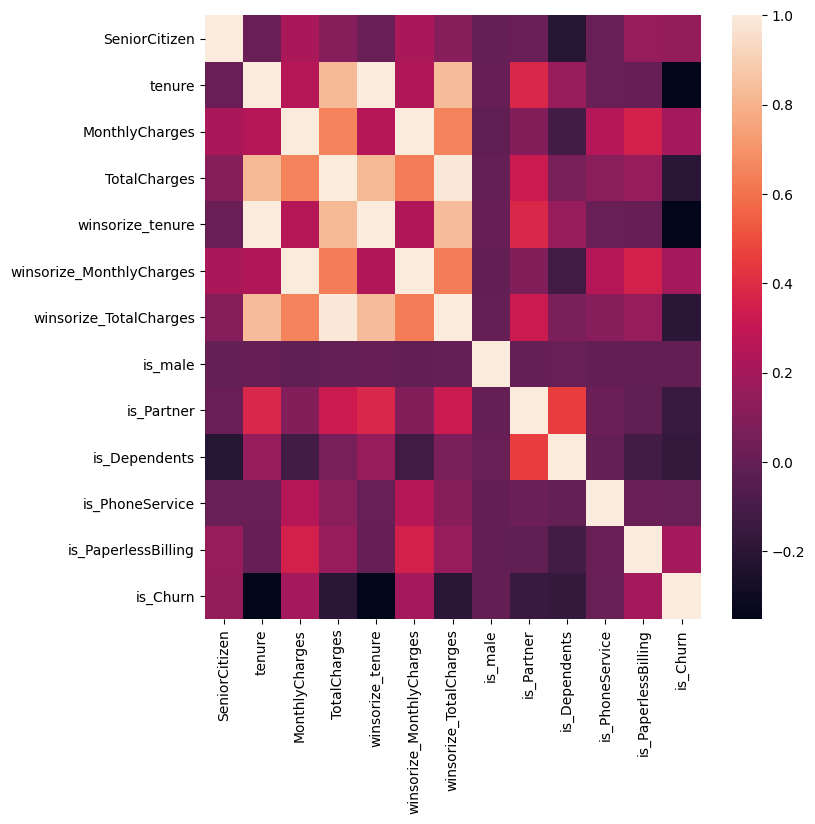

In [50]:
sns.heatmap(df.corr())

is_churn değişkeni ile dependents, tenure gibi değişkenler negatif ilişki içinde iken; PaperlessBilling, MonthlyCharges ve SeniorCitizen değişkenleri pozitif bir ilişki içinde.

In [51]:
#Normal dağılmayan bir değişken ile çalışmak
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["MonthlyCharges", "TotalCharges"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,MonthlyCharges,891.33402,0.00000,1774.49689,0.00000
1,TotalCharges,693.79376,0.00000,569.18497,0.00000


***Normalleştirme ve Standartlaştırma***

In [52]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

df["norm_winsorize_tenure"] = normalize(np.array(df["winsorize_tenure"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_MonthlyCharges"] = normalize(np.array(df["winsorize_MonthlyCharges"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_TotalCharges"] = normalize(np.array(df["winsorize_TotalCharges"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["winsorize_tenure","norm_winsorize_tenure","winsorize_MonthlyCharges","norm_winsorize_MonthlyCharges",
                    "winsorize_TotalCharges","norm_winsorize_TotalCharges"]


print('Minimum Değer\n',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer',)
print(df[normal_ozellikler].max())

Minimum Değer

winsorize_tenure                 0.00000
norm_winsorize_tenure            0.00000
winsorize_MonthlyCharges        18.25000
norm_winsorize_MonthlyCharges    0.00308
winsorize_TotalCharges          18.80000
norm_winsorize_TotalCharges      0.00007
dtype: float64

Maksimum Değer
winsorize_tenure                  69.00000
norm_winsorize_tenure              0.02043
winsorize_MonthlyCharges         102.60000
norm_winsorize_MonthlyCharges      0.01733
winsorize_TotalCharges          5974.29980
norm_winsorize_TotalCharges        0.02382
dtype: float64


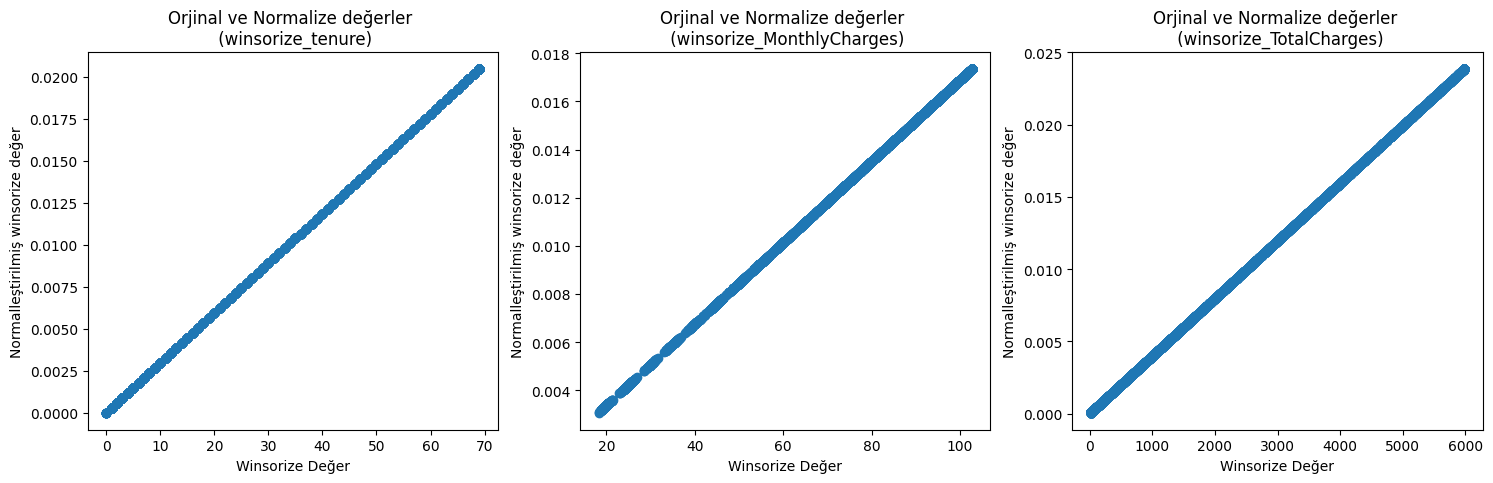

In [53]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]))
    plt.xlabel("Winsorize Değer")
    plt.ylabel("Normalleştirilmiş winsorize değer")

plt.show()

In [54]:
df["olcekli_winsorize_tenure"] = scale(df["winsorize_tenure"])
df["olcekli_winsorize_MonthlyCharges"] = scale(df["winsorize_MonthlyCharges"])
df["olcekli_winsorize_TotalCharges"] = scale(df["winsorize_TotalCharges"])
olcekli_ozellikler=["winsorize_tenure","olcekli_winsorize_tenure","winsorize_MonthlyCharges",
                    "olcekli_winsorize_MonthlyCharges","winsorize_TotalCharges","olcekli_winsorize_TotalCharges"]

print('Standart Sapmalar\n',)
print(df[olcekli_ozellikler].std())
print('\nOrtalamalar',)
print(df[olcekli_ozellikler].mean())

Standart Sapmalar

winsorize_tenure                     24.21717
olcekli_winsorize_tenure              1.00007
winsorize_MonthlyCharges             29.28140
olcekli_winsorize_MonthlyCharges      1.00007
winsorize_TotalCharges             2046.22437
olcekli_winsorize_TotalCharges        1.00007
dtype: float64

Ortalamalar
winsorize_tenure                     32.15178
olcekli_winsorize_tenure             -0.00000
winsorize_MonthlyCharges             64.19504
olcekli_winsorize_MonthlyCharges      0.00000
winsorize_TotalCharges             2178.54419
olcekli_winsorize_TotalCharges        0.00000
dtype: float64


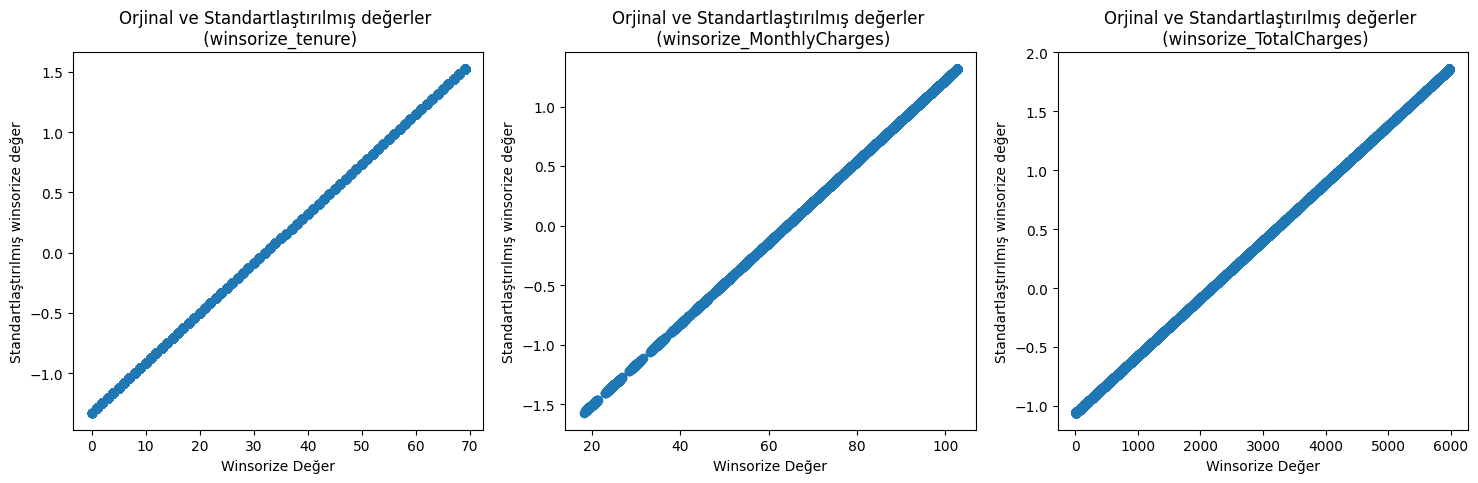

In [55]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[olcekli_ozellikler[2*i]], df[olcekli_ozellikler[2*i+1]])
    plt.title("Orjinal ve Standartlaştırılmış değerler \n ({})".format(olcekli_ozellikler[2*i]))
    plt.xlabel("Winsorize Değer")
    plt.ylabel("Standartlaştırılmış winsorize değer")

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,is_Dependents,is_PhoneService,is_PaperlessBilling,is_Churn,norm_winsorize_tenure,norm_winsorize_MonthlyCharges,norm_winsorize_TotalCharges,olcekli_winsorize_tenure,olcekli_winsorize_MonthlyCharges,olcekli_winsorize_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,1,0,0.00030,0.00504,0.00012,-1.28644,-1.17301,-1.05016
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,1,0,0,0.01007,0.00962,0.00753,0.07632,-0.24745,-0.14127
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,1,1,1,0.00059,0.00909,0.00043,-1.24515,-0.35332,-1.01189
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,0,0,0.01332,0.00714,0.00734,0.53058,-0.74780,-0.16510
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,1,1,1,0.00059,0.01194,0.00060,-1.24515,0.22217,-0.99063


In [57]:
df1 = df.select_dtypes(exclude=['object'])
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,winsorize_tenure,winsorize_MonthlyCharges,winsorize_TotalCharges,is_male,is_Partner,is_Dependents,is_PhoneService,is_PaperlessBilling,is_Churn,norm_winsorize_tenure,norm_winsorize_MonthlyCharges,norm_winsorize_TotalCharges,olcekli_winsorize_tenure,olcekli_winsorize_MonthlyCharges,olcekli_winsorize_TotalCharges
0,0,1,29.85000,29.85000,1,29.85000,29.85000,0,1,0,0,1,0,0.00030,0.00504,0.00012,-1.28644,-1.17301,-1.05016
1,0,34,56.95000,1889.50000,34,56.95000,1889.50000,1,0,0,1,0,0,0.01007,0.00962,0.00753,0.07632,-0.24745,-0.14127
2,0,2,53.85000,108.15000,2,53.85000,108.15000,1,0,0,1,1,1,0.00059,0.00909,0.00043,-1.24515,-0.35332,-1.01189
3,0,45,42.30000,1840.75000,45,42.30000,1840.75000,1,0,0,0,0,0,0.01332,0.00714,0.00734,0.53058,-0.74780,-0.16510
4,0,2,70.70000,151.64999,2,70.70000,151.64999,0,0,0,1,1,1,0.00059,0.01194,0.00060,-1.24515,0.22217,-0.99063


In [58]:
cols = ["winsorize_tenure","winsorize_MonthlyCharges","winsorize_TotalCharges",'norm_winsorize_tenure','norm_winsorize_MonthlyCharges', "norm_winsorize_TotalCharges","olcekli_winsorize_tenure", "olcekli_winsorize_MonthlyCharges","olcekli_winsorize_TotalCharges"]
df2 = df1.drop(cols, axis=1)
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,is_male,is_Partner,is_Dependents,is_PhoneService,is_PaperlessBilling,is_Churn
0,0,1,29.85000,29.85000,0,1,0,0,1,0
1,0,34,56.95000,1889.50000,1,0,0,1,0,0
2,0,2,53.85000,108.15000,1,0,0,1,1,1
3,0,45,42.30000,1840.75000,1,0,0,0,0,0
4,0,2,70.70000,151.64999,0,0,0,1,1,1


<AxesSubplot:>

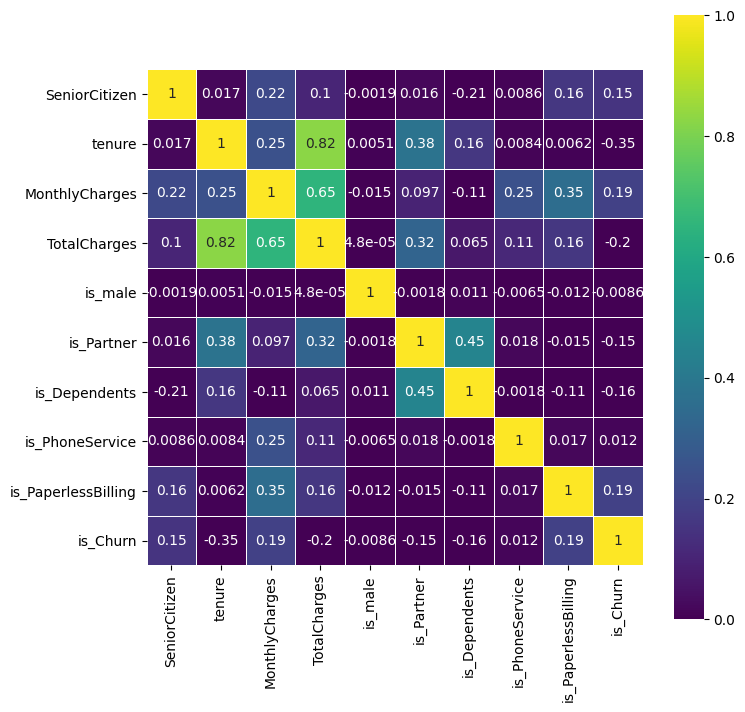

In [59]:
sns.heatmap(df2.corr(),  square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

# SINIFLANDIRMA

Problem bir binary classification problemi. Bu aşamada baştaki veri çerçevesine uygun feature'lar seçilerek KNN, Gradient Boosting ve Random Forest sınıflandırıcıları uygulanacak. 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Kullanılacak kütüphaneler eklendikten sonra hedef değişken olan is_churn belirlenerek algoritmalar uygulanmaya başlanır. 

In [61]:
scaler = StandardScaler().fit(df2.drop("is_Churn",axis=1))
X = scaler.transform(df2.drop("is_Churn",axis=1))
y = df2["is_Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20,random_state=0)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

ranfor = RandomForestClassifier(random_state=15)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [63]:
clf_score = cross_val_score(ranfor, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78723404 0.80319149 0.78546099 0.79255319 0.78152753 0.76376554
 0.76731794 0.78685613 0.76554174 0.77797513]


0.7811423730521648

cross validation score ile sınıflandırma sonucu Random Forest algoritması %78'lik bir doğruluk verir. Sonraki aşamada daha iyi sonuçlar elde etmek için de GridSearch kullanılır.

In [64]:
param_grid  = { 
                'n_estimators' : [500,1200],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridS = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridS.fit(X_train, y_train)
print(
     "\nBest parameters \n" + str(GridS.best_params_))


Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 1200}


In [65]:
ranfor_2 = RandomForestClassifier(random_state=15,**GridS.best_params_)
ranfor_2.fit(X_train, y_train)

RandomForestClassifier(class_weight={1: 1.5}, max_depth=3, max_features='log2',
                       n_estimators=1200, random_state=15)

In [66]:
clf_score = cross_val_score(ranfor_2, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81737589 0.80141844 0.79609929 0.79255319 0.79040853 0.79751332
 0.76909414 0.79751332 0.79396092 0.79573712]


0.7951674161974226

**GridSearch sonucu belirlenen parametrelerle ranfor_2 adında yeni bir random forest modeli oluşturulur ve bu modelin performası da yaklaşık %80'e çıkar.**

In [67]:
from sklearn.metrics import confusion_matrix

y_pred = ranfor.predict(X_train)

print(confusion_matrix(y_train, y_pred))

[[4121   12]
 [   9 1492]]


Random forest uygulandıktan sonra bir de KNN ve Gradient Boosting ile oluşturulacak modellerin performanslarını ölçmek ve karşılaştırmak için bir Model fonksiyonu oluşturulur.

In [68]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,accuracy_score,confusion_matrix
def Model(model):
    global X,y,X_train, X_test, y_train, y_test
    print(type(model).__name__)
    pred = model.predict(X_test)
    acs = accuracy_score(y_test,pred)
    print("Accuracy Score             :",acs)
    
    plot_confusion_matrix(model,X,y)
    plt.title("Confusion Matrix")
    plt.show()

KNeighborsClassifier
Accuracy Score             : 0.7743080198722498


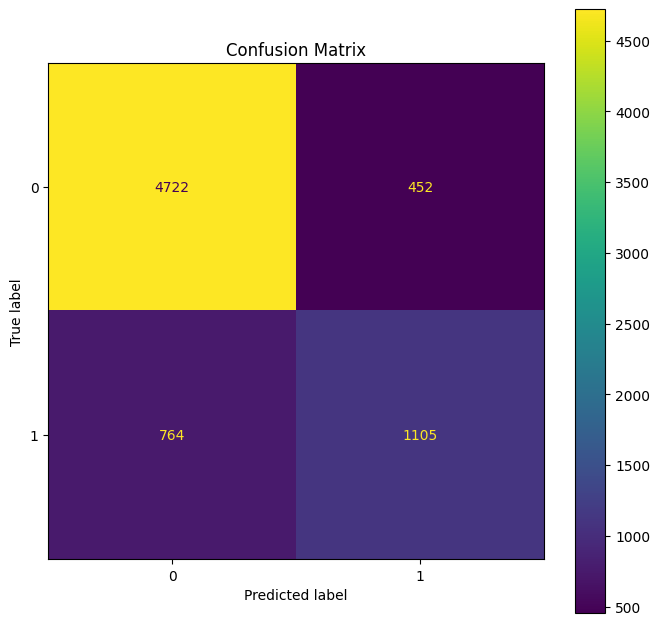

In [69]:
k_enyakın = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
Model(k_enyakın)

GradientBoostingClassifier
Accuracy Score             : 0.7849538679914834


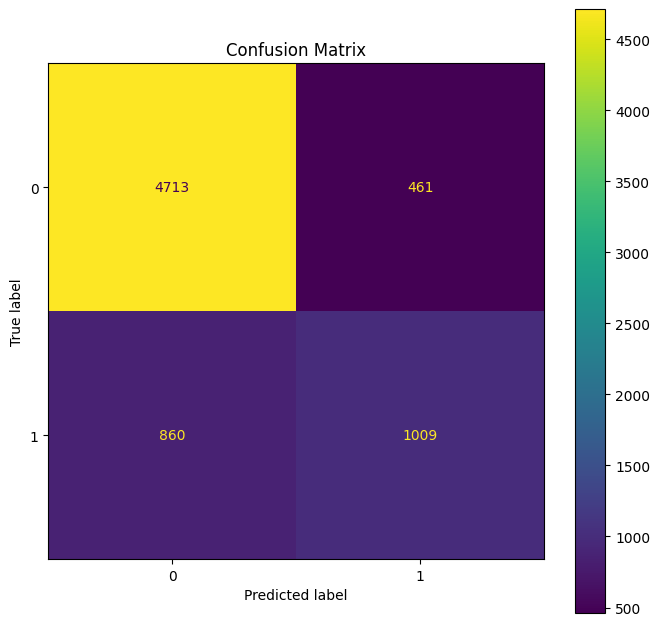

In [70]:
grad_boost = GradientBoostingClassifier(n_estimators=100).fit(X_train,y_train)
Model(grad_boost)

**Bu sonuçlara göre de performans olarak KNN ve Gradient Boosting metotları sırasıyla %77 ve %78'lik sonuçlar verirler. İkisi arasında bir karşılaştırma yapıldığında, churn edip etmeme sınıfını tahmin ederken, grad_boost modeli k-enyakin modelinden daha iyi bir sonuç vermiştir diyebiliriz**